In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import cifar_data_utils
from cifar_vae_lib import CIFARConditionalVAE
from cifar_classifier_lib import Wide_ResNet
import cifar_semisupervised_lib

import semisupervised_vae_lib as ss_vae_lib

import pickle

# Load data

In [2]:
sys.path.insert(0, '../../../pytorch-vae/')
import utils as default_cifar_vae_utils
import data as default_cifar_vae_data
from tqdm import tqdm

Files already downloaded and verified
Files already downloaded and verified


In [3]:
data_loader = default_cifar_vae_utils.get_data_loader(default_cifar_vae_data.TRAIN_DATASETS['cifar10'], 50)

In [4]:
data_stream = tqdm(enumerate(data_loader, 1))

for batch_index, (x, _) in data_stream:
    data = x
    break

0it [00:00, ?it/s]

In [5]:
def plot_cifar_image(image, fig, label = None, scale = True):
    if scale: 
        image_unscaled = image * cifar_data_utils.CIFAR10_STD_TENSOR + cifar_data_utils.CIFAR10_MEAN_TENSOR
    else: 
        image_unscaled = image

    img = np.dstack((image_unscaled[0, :, :],
                            image_unscaled[1, :, :],
                            image_unscaled[2, :, :]))

    fig.imshow(img)
    
    if label is not None: 
        fig.set_title(cifar_data_utils.cifar100_fine_labels_legend[label])
        

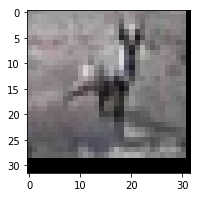

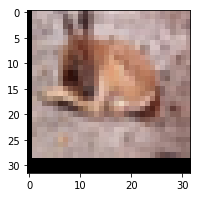

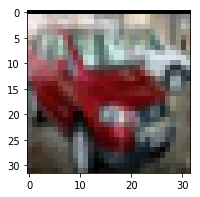

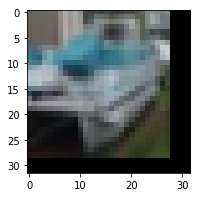

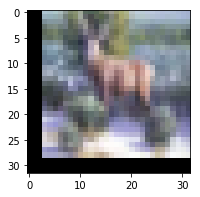

In [6]:
for n in range(5): 
    _, axarr = plt.subplots(1, 1, figsize=(3, 3))

    plot_cifar_image(data[n, :, :, :], axarr, scale = False)

In [7]:
# Load vae

In [8]:
import model as default_cifar_vae_model


In [9]:
model = default_cifar_vae_model.VAE(label = 'cifar10', 
                              image_size = 32, 
                              channel_num = 3, 
                              kernel_num = 128, z_size = 128)

In [10]:
default_cifar_vae_utils.load_checkpoint(model, '../../../pytorch-vae/checkpoints/')

=> loaded checkpoint of VAE-128k-cifar10-3x32x32 from ../../../pytorch-vae/checkpoints/VAE-128k-cifar10-3x32x32


10

In [11]:
_, reonstructed_x = model(data)

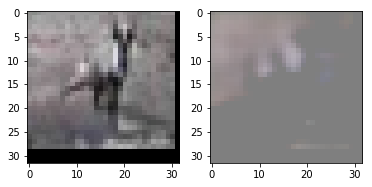

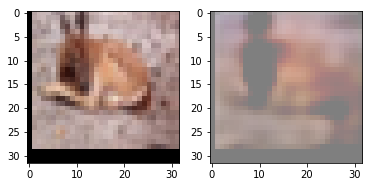

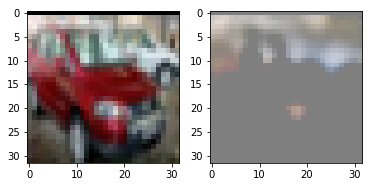

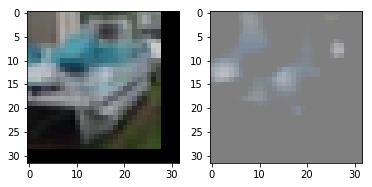

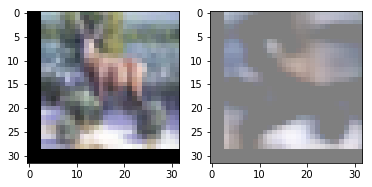

In [12]:
for n in range(5): 
    _, axarr = plt.subplots(1, 2, figsize=(6, 6))
    
    plot_cifar_image(data[n, :, :, :], axarr[0], scale = False)
    plot_cifar_image(reonstructed_x[n, :, :, :].detach(), axarr[1], scale = False)